# Data Discretization
Data discretization is a preprocessing technique used in data mining and machine learning to transform continuous variables into discrete intervals or categories. It involves partitioning the range of values of a continuous attribute into a finite number of intervals, bins, or categories.



In [5]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [6]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:

# impute missing values
df['fare']=df['age'].fillna(df['fare'].median())
df['age']=df['age'].fillna(df['age'].median())

In [10]:
# age discretization
age_discretizer=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
df['age_bin']=age_discretizer.fit_transform(df[['age']])

c:\Users\MC\miniconda3\envs\python_eda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,22.0,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,38.0,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,26.0,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,35.0,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,35.0,S,Third,man,True,NaN,Southampton,no,True,2.0


<Axes: xlabel='age', ylabel='Count'>

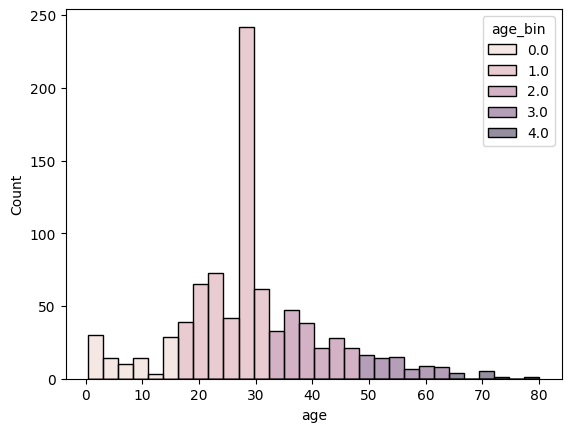

In [13]:
sns.histplot(df,x='age',hue='age_bin')